<a href="https://colab.research.google.com/github/satyasaran/Deep-learning/blob/master/Capstone_Project_Satyasaran_Changdar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
from skimage import io
import keras
from keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import EarlyStopping 
from keras.callbacks import ModelCheckpoint
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/My Drive/CAPSTONE PROJECT/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/CAPSTONE PROJECT/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [ ]:
#Extract training and testing from dataset
X_train=train['X']
y_train=train['y']
X_test=test['X']
y_test=test['y']

In [ ]:
#Shape of the array
X_train.shape

(73257, 32, 32, 3)

In [ ]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]


In [ ]:
#Shape of the array after transpose
X_train.shape

(73257, 32, 32, 3)

In [ ]:
#Plot for color images
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

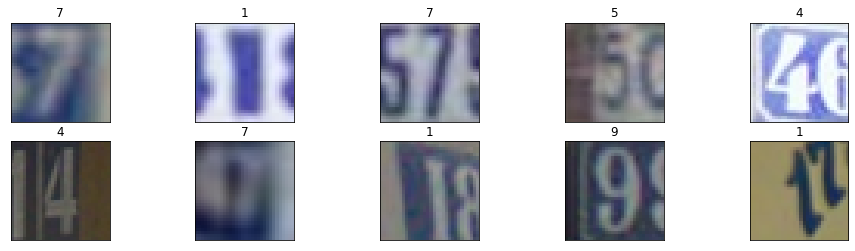

In [ ]:
# Plot 10 random training images
random_inx = np.random.choice(X_train.shape[0],10)
X_train_random = X_train[random_inx]
y_train_random=y_train[random_inx]
plot_images(X_train_random, y_train_random, 2, 5)

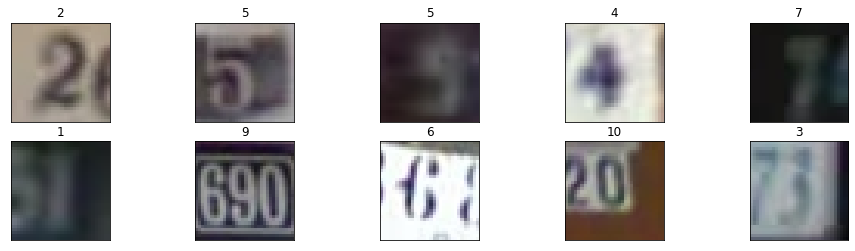

In [ ]:
# Plot 10 random testing images
random_inx = np.random.choice(X_test.shape[0],10)
X_test_random = X_test[random_inx]
y_test_random=y_test[random_inx]
plot_images(X_test_random, y_test_random, 2, 5)

In [ ]:
#Function to convert RGB to gray
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [1/3, 1/3, 1/3]), axis=3)

In [ ]:
X_train_greyscale = rgb2gray(X_train).astype(np.float64)
X_test_greyscale = rgb2gray(X_test).astype(np.float64)

In [ ]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

In [ ]:
#Plot for gray  images
def plot_gimages(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i],cmap='gray')
        else:
            ax.imshow(img[i,:,:,0],cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

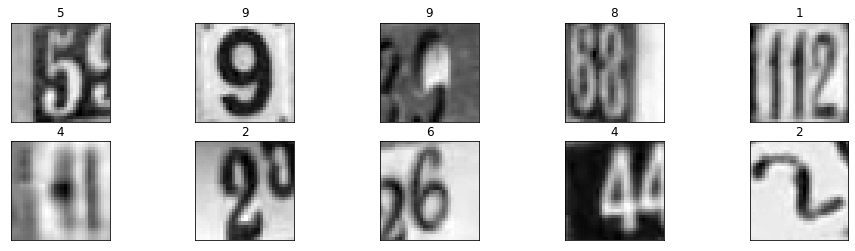

In [ ]:
# Plot 10 random training images
random_inx = np.random.choice(X_train_greyscale .shape[0],10)
X_train_random = X_train_greyscale [random_inx]
y_train_random=y_train[random_inx]
plot_gimages(X_train_random, y_train_random, 2, 5)

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
print('Min: {}, Max: {}'.format(X_train_greyscale.min(), X_train_greyscale.max()))
X_train_greyscale/= 255.0
X_test_greyscale /= 255.0

Min: 0.0, Max: 255.0


In [ ]:
# Original copy of target
copy_y_train=y_train
copy_y_test=y_test

In [ ]:
# Convert targets to a one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
# Build the Sequential feedforward neural network model

model=Sequential([Flatten(input_shape=(32,32,1)), Dense(26, activation='relu'), Dense(16, activation='relu'),Dense(12, activation='relu'), Dense(10,activation='softmax')])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 26)                26650     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                432       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                130       
Total params: 27,416
Trainable params: 27,416
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 #Callbacks ModelCheckpoint and EarlyStopping
model_checkpoint_object= ModelCheckpoint(filepath='checkpoints_best_only/checkpoint', save_weights_only=True,monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)
earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
#Adam optimizer
opt = keras.optimizers.Adam(lr=1e-4, amsgrad=True)

In [ ]:
#model optimizer, loss function and metrics
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
# Fit the model
callbacks = [model_checkpoint_object, earlystop]
history=model.fit(X_train_greyscale,y_train,epochs=60,verbose=1,batch_size=64,validation_split=0.10,callbacks=callbacks)

Epoch 1/60
1024/1031 [============================>.] - ETA: 0s - loss: 2.2747 - accuracy: 0.1441
Epoch 00001: val_accuracy improved from -inf to 0.18782, saving model to checkpoints_best_only/checkpoint
1031/1031 [==============================] - 2s 2ms/step - loss: 2.2743 - accuracy: 0.1447 - val_loss: 2.2428 - val_accuracy: 0.1878
Epoch 2/60
1031/1031 [==============================] - ETA: 0s - loss: 2.2166 - accuracy: 0.2008
Epoch 00002: val_accuracy improved from 0.18782 to 0.21949, saving model to checkpoints_best_only/checkpoint
1031/1031 [==============================] - 2s 2ms/step - loss: 2.2166 - accuracy: 0.2008 - val_loss: 2.1979 - val_accuracy: 0.2195
Epoch 3/60
1014/1031 [============================>.] - ETA: 0s - loss: 2.1719 - accuracy: 0.2279
Epoch 00003: val_accuracy improved from 0.21949 to 0.24270, saving model to checkpoints_best_only/checkpoint
1031/1031 [==============================] - 2s 2ms/step - loss: 2.1713 - accuracy: 0.2281 - val_loss: 2.1502 - val_

In [ ]:
ls


ccheckpoints_best_only/  gdrive/          sample_data/
checkpoints_best_only/   MLP_training_1/


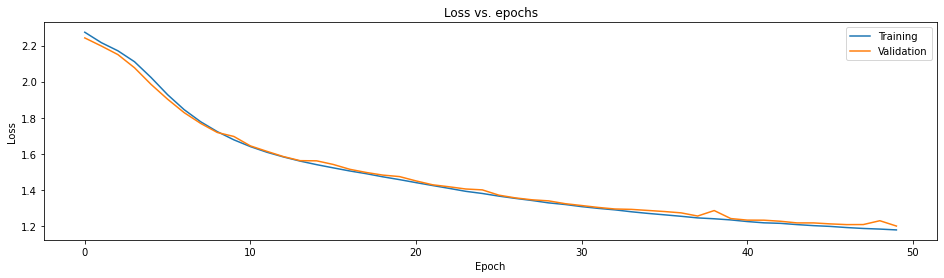

In [ ]:
# plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

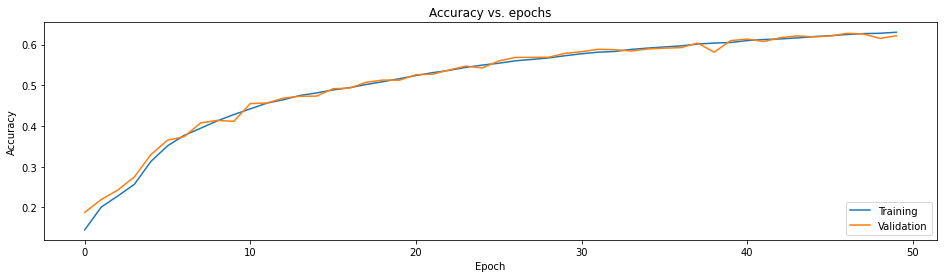

In [ ]:
#  plot the epoch vs accuracy graph
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
# loss and accuracy of the trained model on the test set.
test_loss, test_acc = model.evaluate(x=X_test_greyscale, y=y_test, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 1.331
Test accuracy: 58.59%


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [ ]:
 cmodel=Sequential([Conv2D(16,kernel_size=(3,3),padding='SAME',activation='relu',name='conv_1',input_shape=(32,32,1)),
                     BatchNormalization(),
                     Conv2D(8,kernel_size=(3,3),padding='SAME',activation='relu',name='conv_2'),
                     BatchNormalization(),
                     Dropout(0.3),
                     MaxPooling2D(pool_size=(8,8),name='pool_1'),
                     Flatten(name='flatten'),
                     Dense(32,activation='relu',name='dense_1'),
                     Dropout(0.3),
                     Dense(10,activation='softmax',name='dense_2')
                     ])


In [ ]:
# Print the CNN model summary
cmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 32, 32, 8)         1160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)              

In [ ]:
#callbacks
cmodel_checkpoint_object= ModelCheckpoint(filepath='CNN_training_1/checkpoint', save_weights_only=True,monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)
cearlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
#optimizer 
copt = keras.optimizers.Adam(lr=1e-4, amsgrad=True)

In [ ]:
#model optimizer, loss fu
cmodel.compile(optimizer=copt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Model fitting
ccallbacks = [cmodel_checkpoint_object, cearlystop]
chistory=cmodel.fit(X_train_greyscale,y_train,epochs=30,verbose=1,batch_size=64,validation_split=0.15,callbacks=ccallbacks)

Epoch 1/30
973/973 [==============================] - ETA: 0s - loss: 2.4633 - accuracy: 0.1610
Epoch 00001: val_accuracy improved from -inf to 0.18537, saving model to CNN_training_1/checkpoint
973/973 [==============================] - 96s 99ms/step - loss: 2.4633 - accuracy: 0.1610 - val_loss: 2.2650 - val_accuracy: 0.1854
Epoch 2/30
973/973 [==============================] - ETA: 0s - loss: 2.2569 - accuracy: 0.1873
Epoch 00002: val_accuracy improved from 0.18537 to 0.18992, saving model to CNN_training_1/checkpoint
973/973 [==============================] - 96s 99ms/step - loss: 2.2569 - accuracy: 0.1873 - val_loss: 2.2300 - val_accuracy: 0.1899
Epoch 3/30
973/973 [==============================] - ETA: 0s - loss: 2.2288 - accuracy: 0.1918
Epoch 00003: val_accuracy improved from 0.18992 to 0.20366, saving model to CNN_training_1/checkpoint
973/973 [==============================] - 96s 98ms/step - loss: 2.2288 - accuracy: 0.1918 - val_loss: 2.2065 - val_accuracy: 0.2037
Epoch 4/30

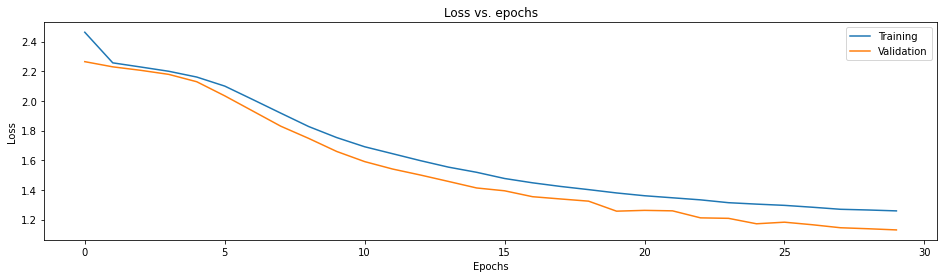

In [ ]:
#Plot the epoch vs loss graph
plt.plot(chistory.history['loss'])
plt.plot(chistory.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

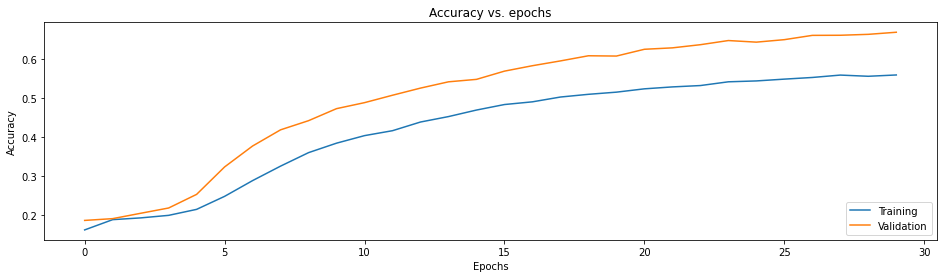

In [ ]:
#  Plot the epoch vs accuracy graph
try:
    plt.plot(chistory.history['accuracy'])
    plt.plot(chistory.history['val_accuracy'])
except KeyError:
    plt.plot(chistory.history['acc'])
    plt.plot(chistory.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
#Compute and display the loss and accuracy of the trained model on the test set.
ctest_loss, ctest_acc = cmodel.evaluate(x=X_test_greyscale, y=y_test, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(ctest_loss, 100 * ctest_acc))

Test loss: 1.143
Test accuracy: 67.82%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [ ]:
# Loads the weights of MLP model
model.load_weights('MLP_training_1/checkpoint')
# Re-evaluate the MLP model
loss,acc = model.evaluate(x=X_test_greyscale, y=y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

814/814 - 1s - loss: 1.5223 - accuracy: 0.5014
Restored model, accuracy: 50.14%


In [ ]:
ls


ccheckpoints_best_only/  CNN_training_1/  MLP_training_1/
checkpoints_best_only/   gdrive/          sample_data/


In [ ]:
# Loads the weights of CNN  model
cmodel.load_weights('CNN_training_1/checkpoint')
# Re-evaluate the CNN model
loss,acc = cmodel.evaluate(x=X_test_greyscale, y=y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

814/814 - 11s - loss: 1.1425 - accuracy: 0.6782
Restored model, accuracy: 67.82%


In [ ]:
# Function to plot images
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i],cmap='gray')
        else:
            ax.imshow(img[i,:,:,0],cmap='gray')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

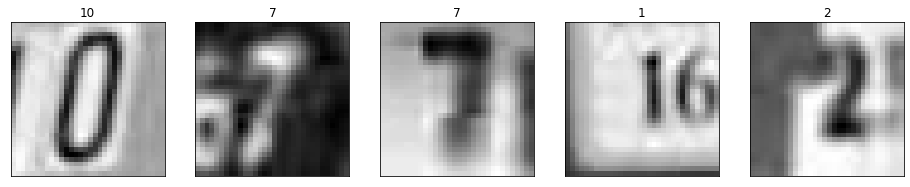

In [ ]:
#Plot 10 random training images
random_inx = np.random.choice(X_test_greyscale.shape[0],5)
X_test_random = X_test_greyscale[random_inx]
y_test_random=copy_y_test[random_inx]
plot_images(X_test_random, y_test_random, 1, 5)

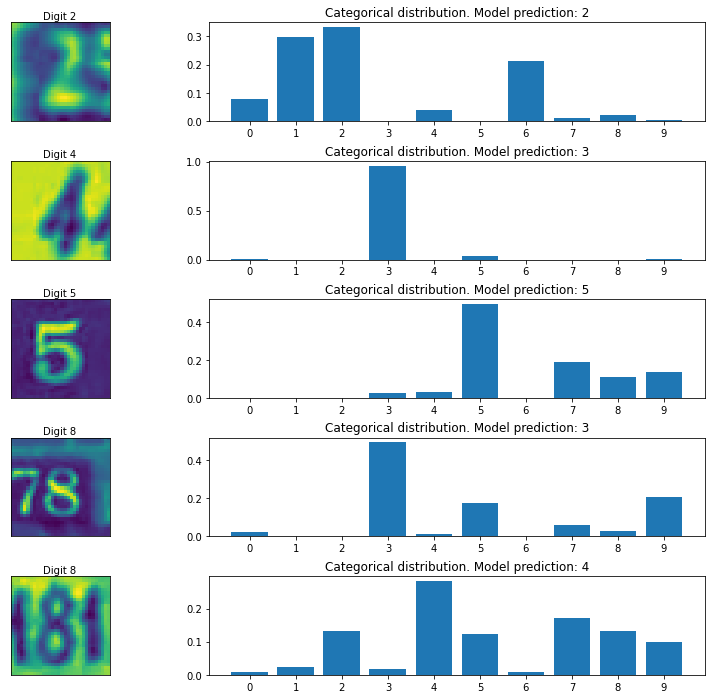

In [ ]:
# Run this cell to get MLP model predictions on randomly selected test images
num_test_images = X_test_greyscale.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_greyscale[random_inx, ...]
random_test_labels = copy_y_test[random_inx, ...]
predictions = model.predict(random_test_images)
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

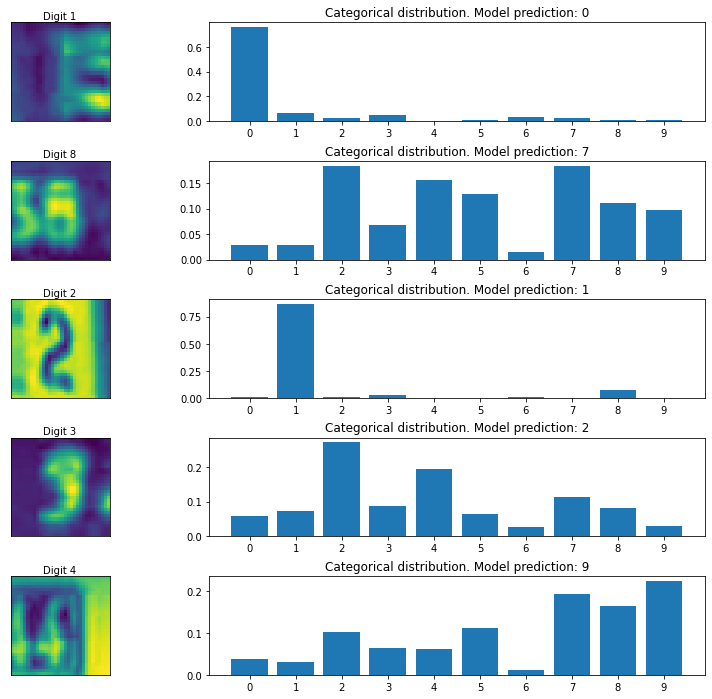

In [ ]:
# Run this cell to get CNN model predictions on randomly selected test images
num_test_images = X_test_greyscale.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test_greyscale[random_inx, ...]
random_test_labels = copy_y_test[random_inx, ...]
predictions = cmodel.predict(random_test_images)
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()